In [344]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns 


In [345]:
df=pd.read_csv('D:\Intenship\Dataset\Kaggle House Prices Dataset\Housing.csv')

In [346]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [347]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

C:\Users\hp\AppData\Local\Temp\ipykernel_3972\1935538580.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.price)


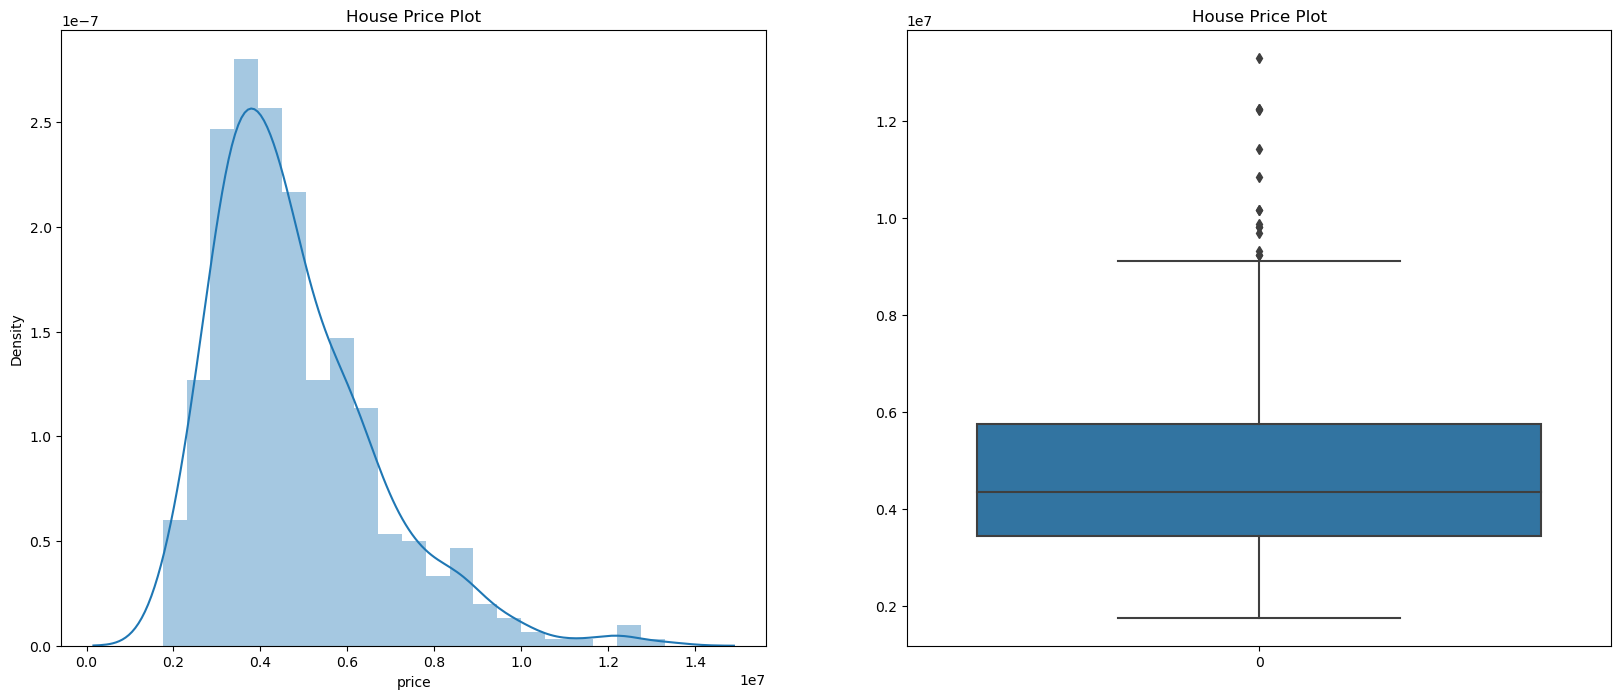

In [356]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.distplot(df.price)
plt.title("House Price Plot")

plt.subplot(1,2,2)
sns.boxplot(df.price)
plt.title("House Price Plot")


plt.show()

In [327]:
,from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler

Le=LabelEncoder()
Or=OrdinalEncoder()

df['furnishingstatus']=Or.fit_transform(df[['furnishingstatus']])
df['mainroad']= Le.fit_transform(df['mainroad'])
df['guestroom']= Le.fit_transform(df['guestroom'])
df['basement']= Le.fit_transform(df['basement'])
df['hotwaterheating']= Le.fit_transform(df['hotwaterheating'])
df['airconditioning']= Le.fit_transform(df['airconditioning'])
df['prefarea']= Le.fit_transform(df['prefarea'])

In [328]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0.0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0.0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1.0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0.0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0.0


In [329]:
X = df[['area', 'bedrooms', 'bathrooms']]
y = df['price']


In [330]:
from sklearn.model_selection import train_test_split

X_train,y_train,X_test,X_train=train_test_split(X,y,test_size=0.2, random_state=42)

In [331]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score



# Define features and target variable
X = df[['area', 'bedrooms', 'bathrooms']]
y = df['price']


 


In [332]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
lr = LinearRegression()
gb = GradientBoostingRegressor()
rf = RandomForestRegressor()
xgb = XGBRegressor()



In [333]:
# List of models
models = [
    ('lr', lr),
    ('gb', gb),
    ('rf', rf),
    ('xgb', xgb),
]



In [334]:
# Convert y_train to a NumPy array if it's a DataFrame
if isinstance(y_train, pd.DataFrame):
    y_train = y_train.values.ravel()
else:
    y_train = y_train.values.ravel()



In [335]:
# Perform cross-validation
for model_name, model in models:
    score = cross_val_score(model, X_train, y_train, scoring='r2', cv=10)
    print(f'{model_name}: {np.round(score.mean(),2)*100}')



lr: 41.0
gb: 47.0
rf: 31.0
xgb: 24.0


In [341]:
# Train and evaluate each model
for model_name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'{model_name} predictions: {y_pred[:2]}')
    print("R2 Score : ",r2_score(y_test,y_pred),)
    print("mean_squared_error : ",mean_squared_error(y_test,y_pred),"\n")

lr predictions: [6383168.05981192 6230250.35140428]
R2 Score :  0.45592991188724474
mean_squared_error :  2750040479309.0513 

gb predictions: [6108915.20163693 6760800.36343805]
R2 Score :  0.4550186297770996
mean_squared_error :  2754646618749.0303 

rf predictions: [7154293.33333333 6271661.66666667]
R2 Score :  0.41061355027134394
mean_squared_error :  2979095212406.062 

xgb predictions: [6333695.5 6035098. ]
R2 Score :  0.4032990278957559
mean_squared_error :  3016066979572.0415 

